<a href="https://colab.research.google.com/github/lzupolini/dev_projeto_final/blob/main/ProjFinal_Dev16FEB23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando pacotes e atualizacoes necessarias

!pip install --upgrade geopandas
!pip install --upgrade dataframe_image
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install mapclassify


In [89]:
#Importando pacotes e dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import geopandas as geo
from geopandas import GeoDataFrame
import mapclassify as map
import seaborn as sns
import plotly.express as px
import dataframe_image as dfi





In [ ]:
#Código para baixar csv de emissões GEE direto do drive
!pip install --upgrade --no-cache-dir gdown
#Código para resolver problema no drive
!gdown -- 1i_RebQCAJ2Jd0wHB0NEEErKnaJAIWnsz

In [ ]:
#Código para baixar csv de transição bioma (mudança uso do solo) direto do drive
!gdown -- 1Ah-8XmRGkYpm4OsS1UrZsU1mUi-pNNxP

#Documentos dos limites geograficos das unidades federativas do Brasil 
#(o trabalhavel e um shapefile, mas os demais tambem devem ser baixados)
!gdown -- 11FiQyjlYgYxn6ExZoB1HhXKXqaqFxOgV
!gdown -- 1A4s2nwWI4zTdEbZQBxqojIrPUS1mRbKE
!gdown -- 1H2E14BeLdNNbSJsdlH6FLHmC-YEkkW9g
!gdown -- 1bwXArivXuNntF2rA1V1--_jFlRePFhA7
!gdown -- 1x3QTYb5cbQYTPeQqJ-ZNU-gnWyB-trHh

In [90]:
trans_bioma_est = pd.read_csv('/content/transicao_estado_bioma_de_para_anual.csv')
gases_est = pd.read_csv('/content/emissao_gee_uf.csv')
gdf_estados = geo.read_file('/content/BR_UF_2021.shp').rename(columns={'SIGLA':'sigla_uf'})

In [ ]:
trans_bioma_est.head()

,ano,sigla_uf,bioma,de_id_classe,de_nivel_0,de_nivel_1,de_nivel_2,de_nivel_3,de_nivel_4,para_id_classe,para_nivel_0,para_nivel_1,para_nivel_2,para_nivel_3,para_nivel_4,area
0,1986,AC,amazonia,3,natural,1. floresta,1.1. floresta natural,1.1.1. formacao florestal,1.1.1. formacao florestal,3,natural,1. floresta,1.1. floresta natural,1.1.1. formacao florestal,1.1.1. formacao florestal,1.583474e+07
1,1986,AC,amazonia,3,natural,1. floresta,1.1. floresta natural,1.1.1. formacao florestal,1.1.1. formacao florestal,12,natural,2. formacao natural nao-florestal,2.2. formacao campestre,2.2. formacao campestre,2.2. formacao campestre,3.711694e+00
2,1986,AC,amazonia,3,natural,1. floresta,1.1. floresta natural,1.1.1. formacao florestal,1.1.1. formacao florestal,15,antropico,3. agropecuaria,3.1. pastagem,3.1. pastagem,3.1. pastagem,1.938106e+04
3,1986,AC,amazonia,3,natural,1. floresta,1.1. floresta natural,1.1.1. formacao florestal,1.1.1. formacao florestal,24,antropico,4. area nao-vegetada,4.2. infraestrutura urbana,4.2. infraestrutura urbana,4.2. infraestrutura urbana,3.840581e+01
4,1986,AC,amazonia,3,natural,1. floresta,1.1. floresta natural,1.1.1. formacao florestal,1.1.1. formacao florestal,25,antropico,4. area nao-vegetada,4.4. outras areas nao-vegetadas,4.4. outras areas nao-vegetadas,4.4. outras areas nao-vegetadas,0.000000e+00


In [ ]:
gases_est.head()

,ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,AC,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AGR,ALIM_BEBIDAS,0.00
1,1970,AC,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CO2e (t) GWP-AR5,AGR,ALIM_BEBIDAS,0.00
2,1970,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,NaN,2.23
3,1970,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CO2e (t) GTP-AR5,PEC,NaN,8.92
4,1970,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CO2e (t) GWP-AR5,PEC,NaN,62.44


In [ ]:
#Verficando número de valores nulos para emissões entre 1986 a 1990
n_cel_nulo = (gases_est.loc[(gases_est['ano'] > 1985)&(gases_est['ano'] < 1991)]['emissao'] == 0).sum()
print(f'{n_cel_nulo} células possuem valores nulos para emissões entre 1986 e 1990')
n_cel_total = len(gases_est.loc[(gases_est['ano'] > 1985)&(gases_est['ano'] < 1991)]['emissao'].index)
print(f'O número total de dados no período é {n_cel_total}')
print(f'Ou seja, no período, {n_cel_nulo/n_cel_total:.1%} dos dados são nulos')


145967 células possuem valores nulos para emissões entre 1986 e 1990
O número total de dados no período é 327675
Ou seja, no período, 44.5% dos dados são nulos


In [ ]:
# Testando duas formas distintas para se chegar ao mesmo resultado:
# o intuito era contar quantas células nulas aparecem entre 1986 e 1990

print((gases_est.loc[(gases_est['ano'] > 1985)&(gases_est['ano'] < 1991)]['emissao'] == 0 ).sum())
print((gases_est.loc[(gases_est['ano'] > 1985)&(gases_est['ano'] < 1991)]['emissao'] == 0 ).value_counts())

145967
False    181708
True     145967
Name: emissao, dtype: int64


In [ ]:
#Número de valores nulos para emissões entre 1990 a 2019
# Os resultados aqui sugerem que o tipo de gás emitido também contribui para tantos valores nulos
n_cel_nulo_90_20 = (gases_est.loc[(gases_est['ano'] > 1989)&(gases_est['ano'] < 2020)]['emissao'] == 0).sum()
print(f'{n_cel_nulo_90_20} células possuem valores nulos para emissões entre 1990 a 2019')
n_cel_total_90_20 = len(gases_est.loc[(gases_est['ano'] > 1989)&(gases_est['ano'] < 2020)]['emissao'].index)
print(f'O número total de dados no período é {n_cel_total_90_20}')
print(f'Ou seja, no período, {n_cel_nulo_90_20/n_cel_total_90_20:.1%} dos dados são nulos')

589304 células possuem valores nulos para emissões entre 1990 a 2019
O número total de dados no período é 1966050
Ou seja, no período, 30.0% dos dados são nulos


In [ ]:
#Analisando a participação de outros gases nos valores nulos. 
# Uma observação visual inicial sugere que outros gases podem aparecer com maior frequência com valores nulos
analise_tipo = (gases_est.loc[(gases_est['ano'] > 1989)&(gases_est['ano'] < 2020)&('CH4' not in gases_est['gas'])|('CO2' not in gases_est['gas'])]['emissao'] == 0)
print(f'Filtrando apenas os valores para tipos de gases que não sejam CH4 e CO2 no período 1990-2019, vemos que {n_cel_nulo_90_20/analise_tipo.sum():.1%} dos dados nulos são referentes aos demais gases')

Filtrando apenas os valores para tipos de gases que não sejam CH4 e CO2 no período 1990-2019, vemos que 44.9% dos dados nulos são referentes aos demais gases


In [91]:
#Os dados de gases, para antes de 1990, não consideram as 
#fontes de mudança de uso do solo e não são comparáveis, e os dados de mudança do uso
#do solo só vão até 2019. Por isso, usamos apenas o recorte de 90-19


bioma_90_19 = trans_bioma_est[(trans_bioma_est["ano"] > 1989) & (trans_bioma_est["ano"] < 2020)]
bioma_90_19 = bioma_90_19.drop(columns=['de_id_classe', 'para_id_classe'])


#Analisando apenas o nivel de mudanca 0 (contém apenas antropico, natural e nao identificado)

df_bioma_n0 = bioma_90_19.groupby(['ano', 'sigla_uf', 'de_nivel_0', 'para_nivel_0'], as_index=False)['area'].sum()
df_bioma_n0 = df_bioma_n0.set_index('sigla_uf')

#Para os gases, iremos analisar as emissões ao nível 1 também (atividades gerais)

emissoes_90_19 = gases_est[(gases_est["ano"] > 1989) & (gases_est["ano"] < 2020)]
df_emissoes_n1 = emissoes_90_19.drop(columns=['produto', 'atividade_economica', 'nivel_6', 'nivel_5','nivel_4','nivel_3','nivel_2','tipo_emissao'])


In [7]:
#Analisando quantidade de dados nulos no recorte dos 
# dados de emissões (todos os gases) entre 1986 e 1990
analise = df_emissoes_n1.groupby(['ano', 'sigla_uf', 'nivel_1'], as_index=False)['emissao'].sum()
an_nulo = len(analise.loc[analise['emissao'] == 0].index)

print(f'{an_nulo} células possuem valores nulos para emissões entre 1986 e 1990')
an_total = len(analise.index)

print(f'O número total de dados no período é {an_total}')
print(f'Ou seja, no período, {an_nulo/an_total:.1%} dos dados são nulos')

52 células possuem valores nulos para emissões entre 1986 e 1990
O número total de dados no período é 3960
Ou seja, no período, 1.3% dos dados são nulos


In [92]:
#Criando um dicionário com as áreas dos estados.
#Esses dados são usados para corrigir as áreas de conversão e de emissão de GEE mais a frente

areas_est_dict = {'PA': 1245870, 'RO': 237765, 'AC': 164123, 'AM': 1559168, 'RR': 223644, 'AP': 142471, 
             'MT': 903207, 'MS': 357145, 'GO': 340203, 'TO': 277467, 'DF': 5761, 'BA': 564760, 
             'MA': 329642, 'PI': 251756, 'CE': 148894, 'PE': 98068, 'PB': 56467, 'RN': 52810, 
             'AL': 27843, 'SE': 21925, 'PR': 199298, 'RS': 281707, 'SC': 95731,
             'SP': 248219, 'MG': 586521, 'ES': 46074, 'RJ': 43750}

area_estados = pd.DataFrame.from_dict(areas_est_dict, orient='index')
estados = area_estados.index.tolist()


In [93]:

##NIVEL 0: ANTROPICO <-> NATURAL
#Normalizando as areas de mudancas de solo pelas areas totais de cada estado (os dados do MapBiomas, de transicao, 
#estavam em hec: 1 hec = 0,01 km^2. Os dados finais ja estao em porcentagem, sem medida)


#Deixando claro que "area" no MapBiomas se encontra em hectares
df_bioma_n0 = df_bioma_n0.rename(columns={"area" : 'area_ha'})

#Essa alça faz uso da lista com áreas dos estados
for x in estados:
  df_bioma_n0.loc[x, 'area_%'] = df_bioma_n0.loc[x,'area_ha']/area_estados.loc[x][0]

#Segregando dados por de_nivel_0 = antropico -> natural
df_annt = df_bioma_n0.loc[(df_bioma_n0['de_nivel_0'] == 'antropico') & (df_bioma_n0['para_nivel_0'] == 'natural')]

#Segregando dados por de_nivel_0 = natural -> antropico
df_ntan = df_bioma_n0.loc[(df_bioma_n0['de_nivel_0'] == 'natural') & (df_bioma_n0['para_nivel_0'] == 'antropico')]

#Calculando desmatamento (natural -> antrópico) líquido da regeneração (antrópico -> natural)
df_desm_liq = df_ntan.copy(deep=True)

df_desm_liq['area_liq'] = df_ntan['area_ha'] - df_annt['area_ha']
df_desm_liq['area_liq_perc'] = df_ntan['area_%'] - df_annt['area_%']
df_desm_liq.drop(columns= {'area_ha', 'area_%', 'de_nivel_0', 'para_nivel_0'}, inplace=True)



In [94]:
#Iremos analisar a evolução do desmatamento líquido e da emissão de GEE no Brasil

df_desm_BR = df_desm_liq.groupby(['ano'])['area_liq'].sum().to_frame().reset_index()
df_gee_BR = df_emissoes_n1.groupby(['ano'])['emissao'].sum().to_frame().reset_index()


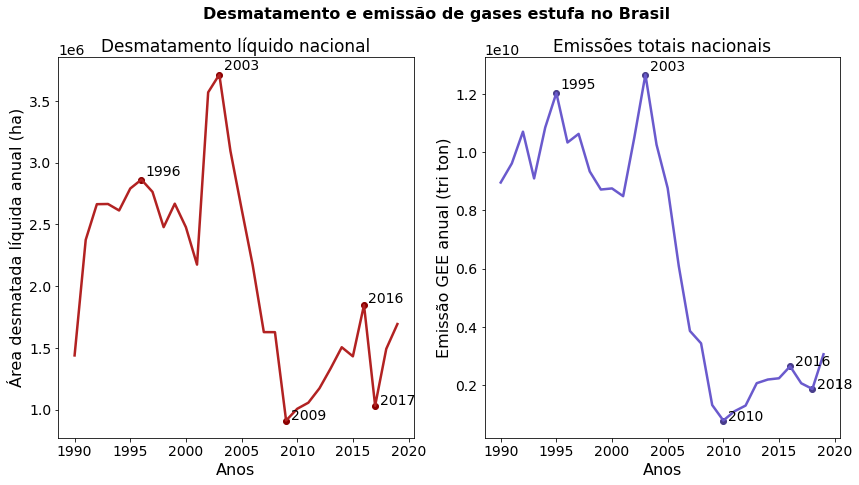

In [95]:
#Plotando as duas séries em gráficos lado a lado

#Destacamos alguns anos em particular

dest_desm = df_desm_BR.loc[(df_desm_BR['ano'] == 1996)|(df_desm_BR['ano'] == 2003) | (df_desm_BR['ano'] == 2009)|(df_desm_BR['ano'] == 2016)|(df_desm_BR['ano'] == 2017)]
dest_emissao = df_gee_BR.loc[(df_gee_BR['ano'] == 1995)|(df_gee_BR['ano'] == 2003) | (df_gee_BR['ano'] == 2010)|(df_gee_BR['ano'] == 2016)|(df_gee_BR['ano'] == 2018)]

fig, ax = plt.subplots(1,2, figsize=(14,7))
ax[0].plot(df_desm_BR.ano, df_desm_BR.area_liq, linewidth=2.5, color='firebrick')
ax[0].scatter(dest_desm.ano, dest_desm.area_liq, marker='o', color='darkred')
for i in range(len(dest_desm)):
  ax[0].text(dest_desm['ano'].iloc[i]*1.0002, dest_desm['area_liq'].iloc[i]*1.011, str(dest_desm['ano'].iloc[i]))
ax[0].set_xlabel('Anos', fontsize=16)
ax[0].set_ylabel('Área desmatada líquida anual (ha)', fontsize=16)
ax[0].set_title('Desmatamento líquido nacional', fontsize=17)


ax[1].plot(df_gee_BR.ano, df_gee_BR.emissao, linewidth=2.5, color='slateblue')
ax[1].scatter(dest_emissao.ano, dest_emissao.emissao, marker='o', color='darkslateblue')
for i in range(len(dest_emissao)):
  ax[1].text(dest_emissao['ano'].iloc[i]*1.0002, dest_emissao['emissao'].iloc[i]*1.011, str(dest_emissao['ano'].iloc[i]))
ax[1].set_xlabel('Anos', fontsize=16)
ax[1].set_ylabel('Emissão GEE anual (tri ton)', fontsize=16)
ax[1].set_title('Emissões totais nacionais', fontsize=17)

fig.suptitle('Desmatamento e emissão de gases estufa no Brasil', fontsize=16, fontweight= 'bold', ha='center', va='top') 
plt.show()


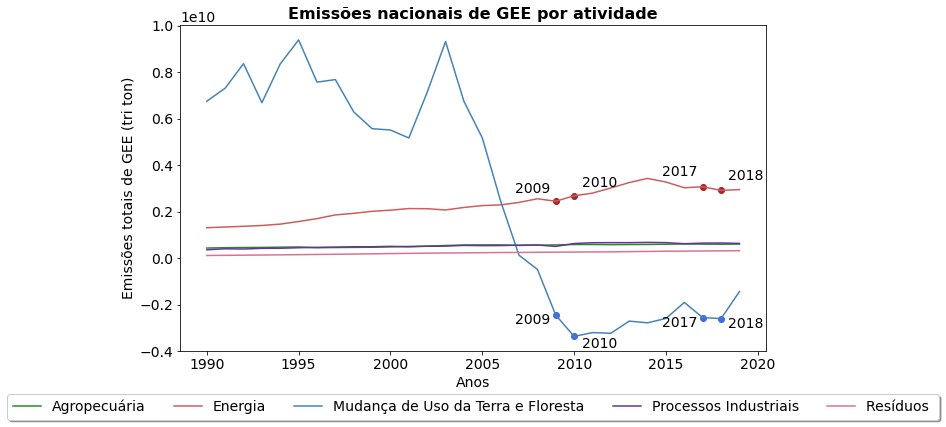

In [84]:
#PLOTANDO EMISSOES TOTAIS NACIONAIS POR ANO E ORIGEM 
#O código destaca as emissões das atividades mais expressivas
#  (ou seja), Energia e Mudança de Uso da Terra e Floresta, em anos em que 
#  parecia haver descompasso entre as variáveis desmatamento líquido (do MapBiomas) e emissões totais

df_gee_tipo = df_emissoes_n1.groupby(['ano', 'nivel_1'])['emissao'].sum().to_frame().reset_index()
anos = [2009, 2010, 2017, 2018]
dest_atividade = ['Energia', 'Mudança de Uso da Terra e Floresta']
cores = ['forestgreen', 'indianred', 'steelblue', 'rebeccapurple', 'palevioletred']
cores2 = ['green','brown', 'royalblue', 'indigo', 'mediumvioletred']

plt.rcParams.update({'font.size': 14, 'figure.figsize':[10.5,6]})
cont = 0
for atividade in df_gee_tipo['nivel_1'].unique():
  plt.plot(df_gee_tipo.loc[df_gee_tipo['nivel_1']== atividade].ano, df_gee_tipo.loc[df_gee_tipo['nivel_1']== atividade].emissao, label=atividade, linewidth=1.5, color=cores[cont])
  for x in dest_atividade:
    if x == atividade:
      if x in dest_atividade:
        for ano in anos:
          if ano == 2009 or ano == 2017:
            plt.scatter(df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].ano, df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].emissao, marker='o', color=cores2[cont])
            plt.text(df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].ano*0.9989, df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].emissao*1.15, str(ano))
          else:
            plt.scatter(df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].ano, df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].emissao, marker='o', color=cores2[cont])
            plt.text(df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].ano*1.0002, df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].emissao*1.15, str(ano))
      else:
        for ano in anos:
          plt.scatter(df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].ano, df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].emissao, marker='o', color=cores2[cont])
          plt.text(df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].ano*1.0002, df_gee_tipo.loc[(df_gee_tipo['ano'] == ano)&(df_gee_tipo['nivel_1']== atividade)].emissao*1.013, str(ano))
  cont += 1

plt.xlabel('Anos', fontsize=14)
plt.ylabel('Emissões totais de GEE (tri ton)', fontsize=14)
plt.title(f'Emissões nacionais de GEE por atividade', fontsize=16, fontweight= 'bold')
plt.legend(fontsize= 'medium', loc='upper center', bbox_to_anchor=(0.5, -0.11),  fancybox=True, shadow=True, ncol=len(df_gee_tipo['nivel_1'].unique()))
plt.show()


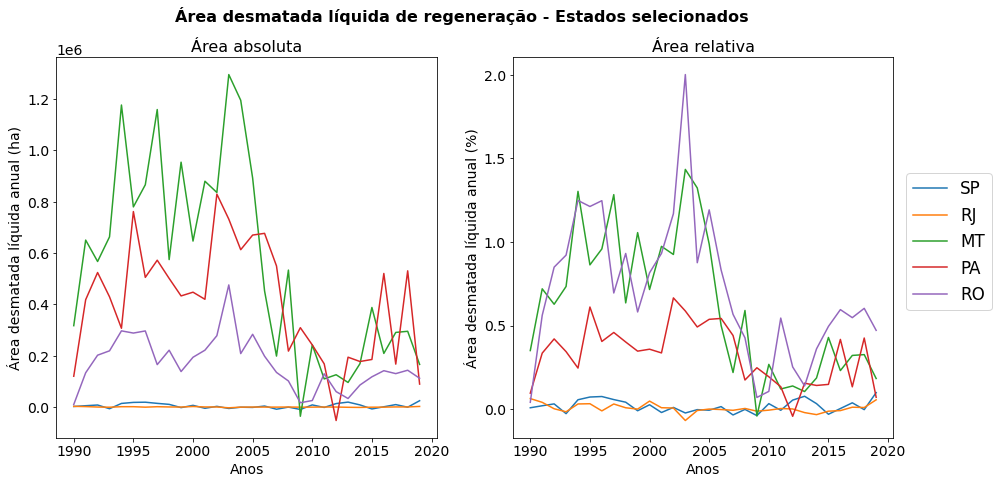

In [96]:
##PLOTANDO OS DADOS DE ESTADOS SELECIONADOS
#PARA ANALISAR O EFEITO DA CORRECAO POR TERRITORIO DO ESTADO

#Lista de estados selecionados
est_sel = {'PA', 'MT', 'RO','RJ', 'SP'}

#Iremos analisar alguns estados particulares ao longo dos anos,
#assim como o efeito da normalização dos valores pelo terrotório total do estado

#Plotando os dois graficos num único eixo, lado a lado

fig, ax = plt.subplots(1,2, figsize=(15, 7))
plt.rcParams.update({'font.size': 14})

#Definindo o eixo 0 (i.e., areas absolutas), com seus dados e legendas
for x in est_sel:
  ax[0].plot(df_desm_liq.loc[x].ano, df_desm_liq.loc[x].area_liq, label=x)

ax[0].set_xlabel('Anos', fontsize=14)
ax[0].set_ylabel('Área desmatada líquida anual (ha)', fontsize=14)
ax[0].set_title('Área absoluta', fontsize=16)


#Definindo o eixo 1 (i.e., areas relativas), com seus dados e legendas

for x in est_sel:
  ax[1].plot(df_desm_liq.loc[x].ano, df_desm_liq.loc[x].area_liq_perc, label=x)

ax[1].set_xlabel('Anos', fontsize=14)
ax[1].set_ylabel('Área desmatada líquida anual (%)', fontsize=14)
ax[1].set_title('Área relativa', fontsize=16)

fig.suptitle('Área desmatada líquida de regeneração - Estados selecionados', fontsize=16, fontweight= 'bold', ha='center', va='top') 

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='right', ncol=1, fontsize='large')

plt.show()



In [98]:
#AGRUPANDO EMISSOES E ANALISANDO OS DADOS POR CONJUNTOS DE ANOS (DECADAS)
#Agrupando os dados de conversao entre decadas a partir dos valores de desmatamento líquido
# e emissoes totais

gee_estado = df_emissoes_n1.groupby(['ano', 'sigla_uf'])['emissao'].sum().reset_index()
df_merged = df_desm_liq.merge(gee_estado, on=['sigla_uf', 'ano'])
df_merged.set_index('sigla_uf', inplace=True)

# Entre 1990-2000
df_merged_90_00 = df_merged.loc[df_merged['ano'] < 2001][['area_liq', 'area_liq_perc', 'emissao']].groupby('sigla_uf').sum()
df_merged_90_00['decada'] = '1991-2000'

# Entre 1990-2000

df_merged_90_00 = df_merged.loc[df_merged['ano'] < 2001][['area_liq', 'area_liq_perc', 'emissao']].groupby('sigla_uf').sum()
df_merged_90_00['decada'] = '1991-2000'

# Entre 2001-2010
df_merged_00_10 = df_merged.loc[(df_merged['ano'] > 2000) & (df_merged['ano'] < 2011)][['area_liq', 'area_liq_perc', 'emissao']].groupby('sigla_uf').sum()
df_merged_00_10['decada'] = '2001-2010'

# Entre 2011-2015
df_merged_11_15 = df_merged.loc[(df_merged['ano'] > 2010) & (df_merged['ano'] < 2016)][['area_liq', 'area_liq_perc', 'emissao']].groupby('sigla_uf').sum()
df_merged_11_15['decada'] = '2011-2015'

# Entre 2016-2019
df_merged_15_20 = df_merged.loc[(df_merged['ano'] > 2015) & (df_merged['ano'] < 2021)][['area_liq', 'area_liq_perc', 'emissao']].groupby('sigla_uf').sum()
df_merged_15_20['decada'] = '2016-2019'

#Agrupando todas as colunas num df acumulado por década

df_merged_acum = df_merged_90_00.append(df_merged_00_10).append(df_merged_11_15).append(df_merged_15_20)
df_merged_acum['area_liq_perc'] = df_merged_acum['area_liq_perc']/100



In [ ]:
#TABELA DOS ESTADOS COM MAIORES DESMATAMENTOS RELATIVOS (%) POR CONJUNTO DE ANOS


#Criando e imprimindo tabela com 5 maiores desmatamentos
#relativos (%) por  por década

maiores_desm = {}
for decada in df_merged_acum['decada'].unique().tolist():
  list_temp = []
  for index, row in df_merged_acum.loc[(df_merged_acum['decada'] == decada)].nlargest(n=5, columns={'area_liq_perc'}).iterrows():
    list_temp.append(str(index)+' ({area:.1%})'.format(area = row['area_liq_perc']))
  maiores_desm[decada] = list_temp


df_maiores_desm = pd.DataFrame(maiores_desm)

#Criamos uma lista com os estados presentes entre os mais desmatados
#Em seguida, verificados quais estados aparecem em 3 ou 4 do conjunto de anos

repetidos =[]
for decada in df_maiores_desm.columns:
  for value in df_maiores_desm[decada]:
    repetidos.append(value[0]+value[1])

rep_3x = []
rep_4x = []
for item in repetidos:
  if repetidos.count(item) > 3:
    if item not in rep_4x:
      rep_4x.append(item)
  elif repetidos.count(item) >2:
    if item not in rep_3x:
      rep_3x.append(item)

def color_background(val):
  for item in rep_4x:
    if item in val:
      color = 'background-color: lightcoral;'
      return color
  for item in rep_3x:
    if item in val:
      color = 'background-color: peachpuff;'
      return color
  else:
    color = ''
    return color

df_maiores_desm.style.applymap(color_background).hide_index()


1991-2000,2001-2010,2011-2015,2016-2019
MT (9.2%),RO (8.2%),SE (2.5%),RO (2.2%)
RO (9.1%),MT (7.2%),RS (2.2%),RS (2.0%)
MS (6.0%),MA (4.6%),TO (2.0%),TO (1.3%)
MA (5.7%),PA (4.2%),MA (1.9%),MA (1.3%)
GO (5.0%),TO (3.2%),RO (1.8%),MT (1.1%)


In [ ]:
#CODIGO PARA SALVAR TABELA COMO IMAGEM
styled_table = df_maiores_desm.style.applymap(color_background).hide_index()

#Para fora do Collab
#dfi.export(styled_table, 'styled_table.png')

#No Collab

dfi.export(
    styled_table,
    "styled_table.png",
    table_conversion="matplotlib"
)


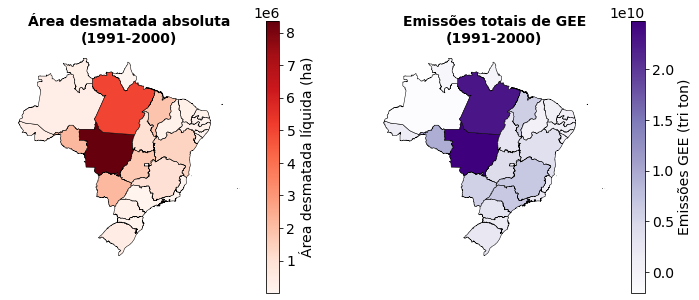

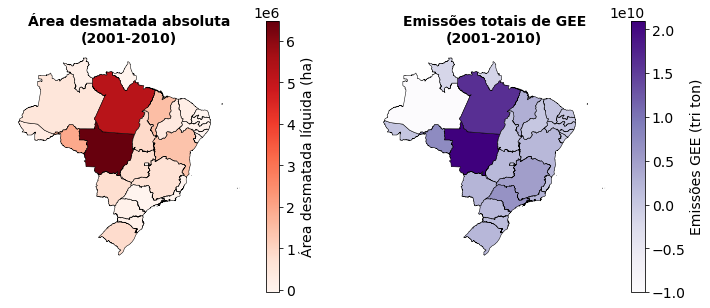

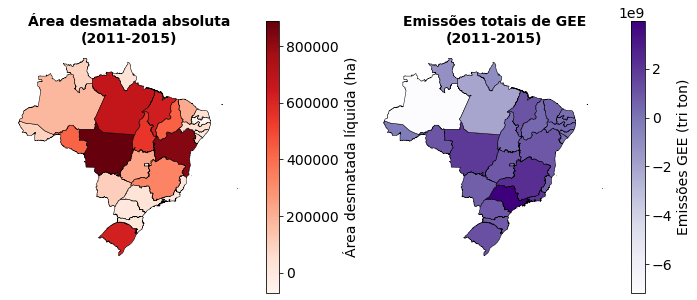

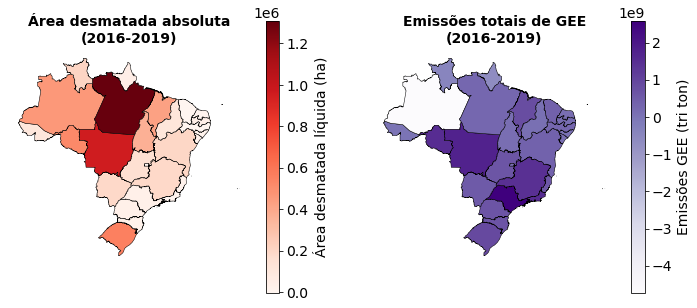

In [99]:
##PLOTANDO MAPAS DE DESMATAMENTO LIQUIDO E EMISSAO GEE POR DECADA##

df_acumulados = df_merged_acum.merge(gdf_estados, on='sigla_uf').drop(
    columns=['CD_UF', 'NM_REGIAO', 'NM_UF'])

gdf_dados_acum = GeoDataFrame(df_acumulados)

for ano in gdf_dados_acum['decada'].unique():
  fig, ax = plt.subplots(1, 2, figsize=[12, 5])
  x = gdf_dados_acum.loc[gdf_dados_acum['decada'] == ano]
  x.set_index('sigla_uf', inplace=True)

  x.plot(column='area_liq', edgecolor="black", cmap='Reds',
         ax=ax[0], legend=True,linewidth=0.5,
         legend_kwds={'label': "Área desmatada líquida (ha)"})
  ax[0].set_axis_off()
  ax[0].set_title(f'Área desmatada absoluta\n({ano})', fontdict={'fontsize': 14,
                                                                    'fontweight' : 'semibold'})
  
  x.plot(column='emissao', edgecolor="black", cmap='Purples',
         ax=ax[1], legend=True, linewidth=0.5, 
         legend_kwds={'label': "Emissões GEE (tri ton)"})
  ax[1].set_axis_off()
  ax[1].set_title(f'Emissões totais de GEE\n({ano})', fontdict={'fontsize': 14,
 'fontweight' : 'semibold'})
  
  plt.show()



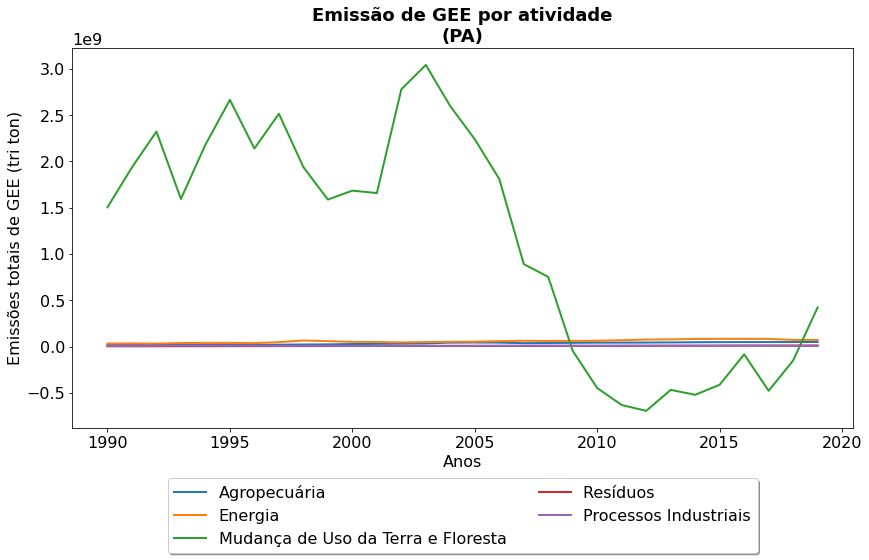

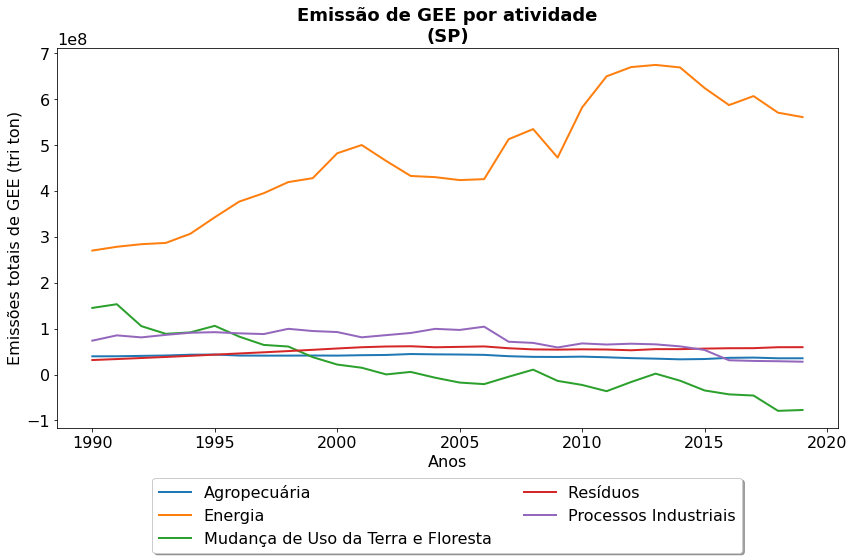

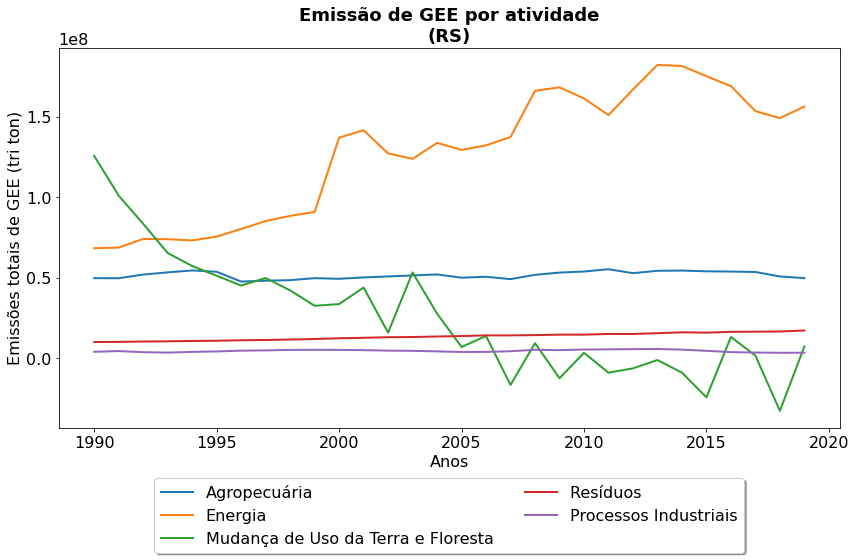

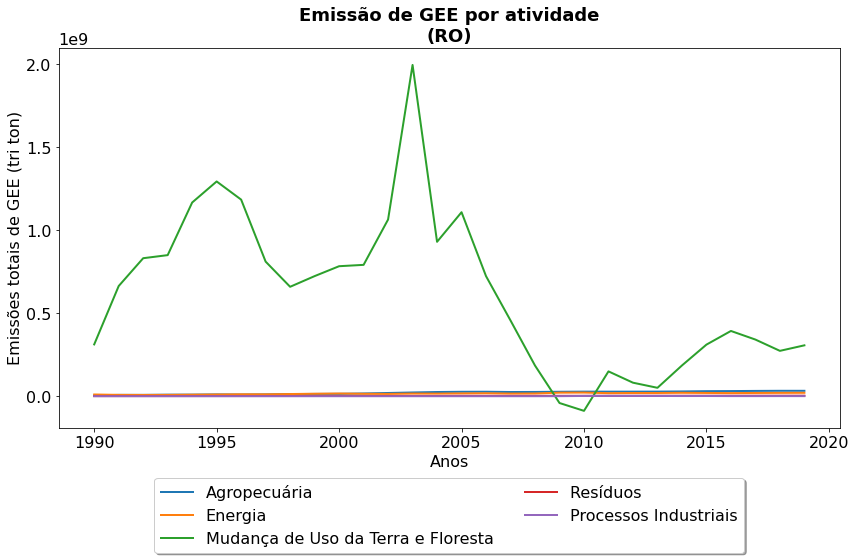

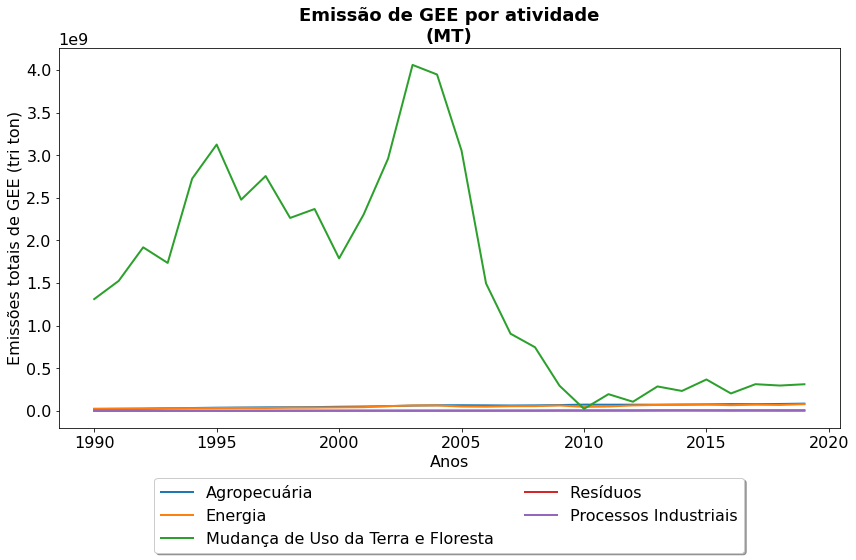

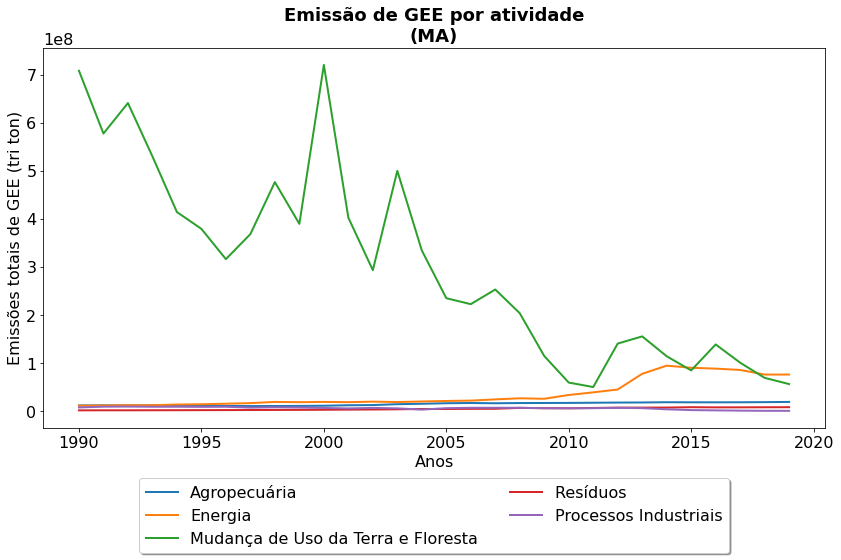

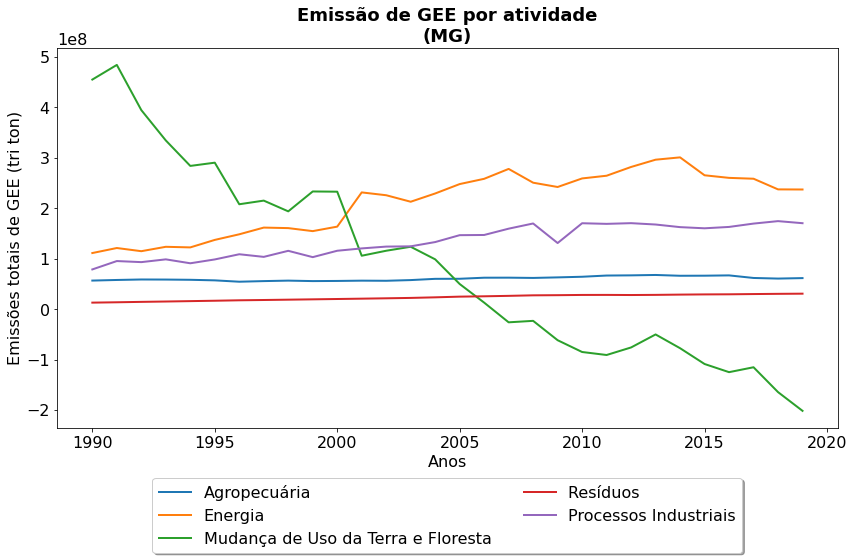

In [121]:
#ANALISANDO EMISSOES POR ATIVIDADE EM ESTADOS SELECIONADOS

#Alguns estados pareceram não ter relação direta nos mapas entre desmatamento e emissões
#Vamos investigar as emissões por atividade ao longo dos anos

analise_estados = ['PA', 'SP', 'RS', 'RO', 'MT', 'MA', 'MG']

#Para investigar todos os estados e avaliar padrões
#analise_estados = estados

df_gee_estados_sel = df_emissoes_n1.groupby(['ano', 'sigla_uf', 'nivel_1'], as_index=False)['emissao'].sum()

plt.rcParams.update({'font.size': 16, 'figure.figsize':[14,7]})

for estado in analise_estados:
  dados = df_gee_estados_sel.loc[df_gee_estados_sel['sigla_uf']== estado]
  for atividade in df_emissoes_n1['nivel_1'].unique():
    plt.plot(dados.loc[df_gee_estados_sel['nivel_1']== atividade].ano, dados.loc[df_gee_estados_sel['nivel_1']== atividade].emissao, label=atividade, linewidth=2)
    plt.xlabel('Anos', fontsize=16)
    plt.ylabel('Emissões totais de GEE (tri ton)', fontsize=16)
    plt.title(f'Emissão de GEE por atividade\n({estado})', fontsize=18, fontweight='bold')
  plt.legend(fontsize= 'medium', loc='upper center', bbox_to_anchor=(0.5, -0.11),  fancybox=True, shadow=True, ncol=round(len(df_emissoes_n1['nivel_1'].unique())*0.5))
  plt.show()




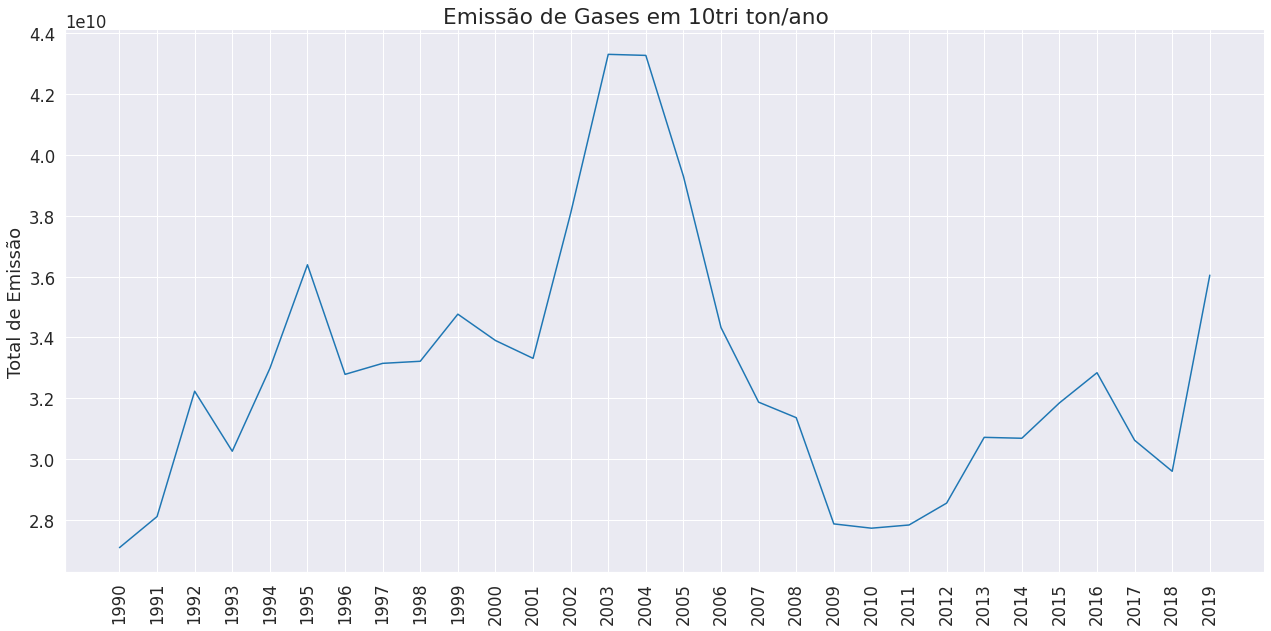

In [ ]:
url='https://drive.google.com/file/d/1nhUlPh8P9db9-T1u3mVkcfonFfywEd2I/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
# Estabeleça o período a ser estudado
anos = [str(x) for x in range(1990,2020)]

# Calcule a emissão total para cada ano do período.
df[anos] = df[anos].apply(pd.to_numeric, errors='coerce', axis=1)
df.loc['Column_Total']= df.sum(numeric_only=True, axis=0)

# Crie o DataFrame com os totais por ano.
data={'anos':anos,'total':df[anos].sum()}
data=pd.DataFrame(data)

# Projete o DataFrame.
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5)
g = sns.relplot(data=data, kind='line', x='anos', y='total', height = 9, aspect = 2)
plt.xlabel('')
plt.ylabel('Total de Emissão')
g.fig.suptitle('Emissão de Gases em 10 tri ton/ano', fontdict = {'fontsize': 14})
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Crie uma lista com todos os estados brasileiros.
url='https://drive.google.com/file/d/1CVykXVGps1TKwSibhUKqdhUMFusW3vfQ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

estados_dict = {}
i = 0
""" Mais uma vez, atente-se ao pathway da importação! """
for chunk in pd.read_csv(url, chunksize=1000):
    for entry in chunk['Estado'].dropna():
        if entry not in estados_dict.keys():
            estados_dict[entry] = i
            i += 1
estados_list = list(estados_dict.keys())
print(estados_list)

['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', 'RO', 'AM', 'PA', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF', 'ES', 'SC', 'RS', 'AC', 'AP', 'RR']


In [ ]:
# faça o somatório das emissões, porém com loop para todos os anos.
totais_estaduais = {}
for est in estados_list:
    estado=[]
    for ano in anos:
        u = df.loc[df['Estado'] == est, ano].sum(axis=0)
        estado.append(u)
    totais_estaduais[est]=estado
totais_estaduais = pd.DataFrame(totais_estaduais)

# Para fins de verificação, olhe ao resumo do DataFrame gerado.
print(totais_estaduais.head())

             SP            BA            RJ            MG           SE  \
0  6.090146e+08  7.018007e+08  1.746398e+08  8.597506e+08  66267271.66   
1  6.704564e+08  7.180667e+08  1.811555e+08  1.015898e+09  42178940.45   
2  6.124636e+08  5.989151e+08  1.812632e+08  9.324052e+08  45288355.88   
3  6.381794e+08  6.484479e+08  1.856953e+08  9.424913e+08  38039849.06   
4  7.188461e+08  5.884737e+08  1.953815e+08  8.732659e+08  39419117.95   

             PR            RO            AM            PA            TO  ...  \
0  4.283072e+08  5.593785e+08  3.143864e+08  2.212638e+09  3.430726e+08  ...   
1  3.859111e+08  8.023402e+08  3.171304e+08  2.512832e+09  3.246447e+08  ...   
2  3.550699e+08  1.124123e+09  4.550338e+08  3.126249e+09  4.124489e+08  ...   
3  3.856194e+08  1.092569e+09  5.046551e+08  2.537967e+09  3.654126e+08  ...   
4  4.004264e+08  1.358759e+09  4.616890e+08  3.011209e+09  3.139537e+08  ...   

             MT            MS            GO           DF            ES  \


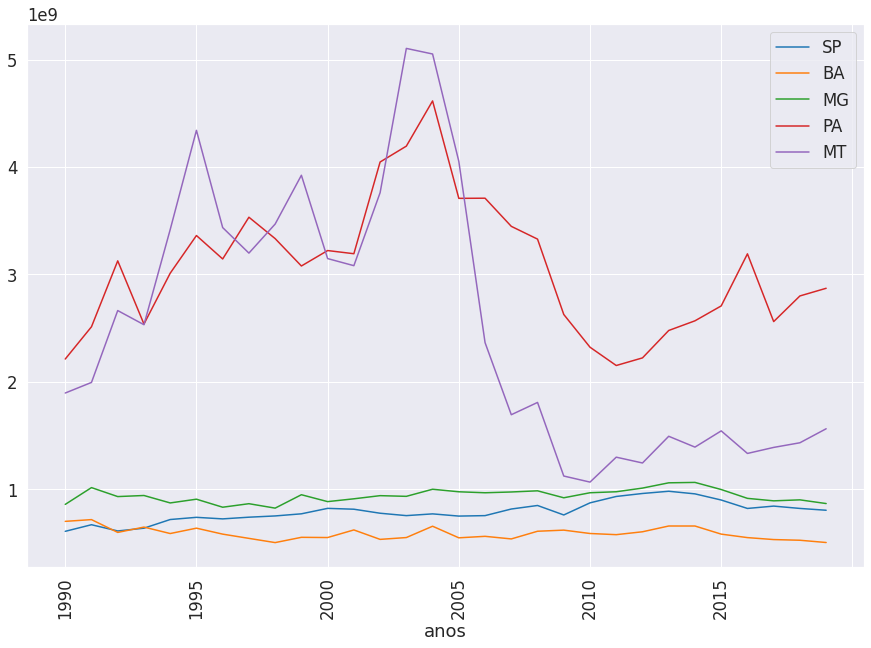

In [ ]:
# Adicione a coluna 'anos' ao DataFrame para que estes apareçam no gráfico resultante.
totais_estaduais['anos'] = anos
totais_estaduais.plot(x = 'anos', y = [estados_list[0],estados_list[1],estados_list[3],
                                       estados_list[8],estados_list[17]], kind = 'line', figsize=(15,10))
# Configure as condições para embelezar o gráfico
g.fig.suptitle('Emissão de Gases em 10tri ton/ano')
plt.xticks(rotation=90)

""" Caso queira usar todos os estados, ative a próxima linha. """
#plt.legend(bbox_to_anchor = (1.05,1), title = 'estados')

plt.show()

['N2O (t)', 'CO (t)', 'NOx (t)', 'CO2 (t)', 'CH4 (t)']
Diga um ano entre 1990-2019.  2016


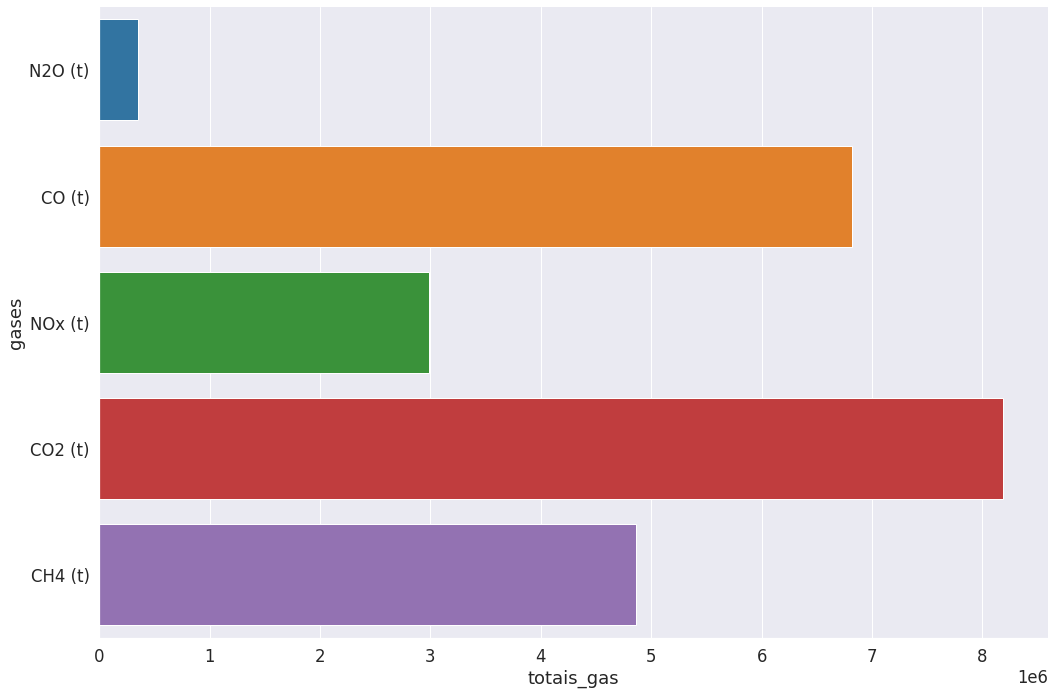

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Faça o mesmo processo feito com os estados, mas agora filtrando para cada gás emitido.
gases_dict = {}
i = 0
for chunk in pd.read_csv(url, chunksize=1000):
    for entry in chunk['Gás'].dropna():
        if entry not in gases_dict.keys():
            gases_dict[entry] = i
            i += 1
gases_list = list(gases_dict.keys())

# Selecione os gases mais importantes para análise, evitando que a visualização fique *poluída*.
gases_list = [gases_list[1],gases_list[2],gases_list[3],gases_list[6],gases_list[7]]
print(gases_list)

# Pergunte ao usuário em qual ano ele gostaria de fazer a análise.
while True:
    ano_esc = input('Diga um ano entre 1990-2019.  ')
    if ano_esc in anos:
        break

# Como o CO2 é (consideravelmente) mais emitido, colocaremos as emissões de CO2 divididas por 250, prezando a visualização
# dos dados.
totais_gas = []
for gas in gases_list:
    if gas == 'CO2 (t)':
        u = df.loc[df['Gás'] == 'CO2 (t)', ano_esc].sum(axis=0)/250
        totais_gas.append(u)
    else:
        u = df.loc[df['Gás'] == gas, ano_esc].sum(axis=0)
        totais_gas.append(u)
dados_gas = {'gases':gases_list, 'totais_gas':totais_gas}
dados_gas = pd.DataFrame(dados_gas)

# Projete o DataFrame.
sns.catplot(data=dados_gas,kind='bar',x='totais_gas',y='gases', height = 10, aspect = 1.5)
plt.figure(figsize=(20,10))
plt.show()

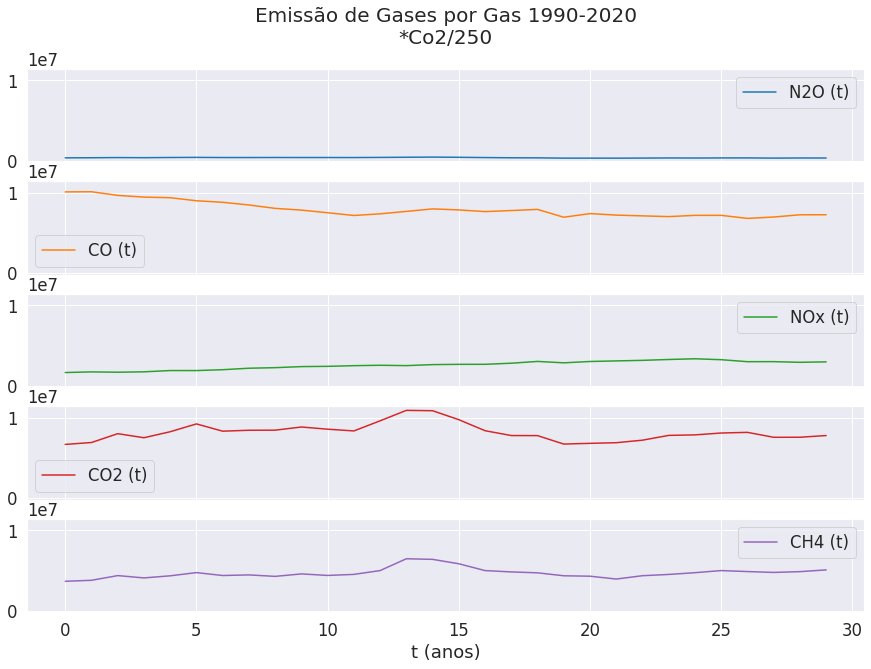

In [ ]:
# Repita o processo com um loop para todos os anos.
totais_gases = {}
for gas in gases_list:
    gas_cont = []
    if gas == 'CO2 (t)':
        for ano in anos:
            u = df.loc[df['Gás'] == 'CO2 (t)', ano].sum(axis=0)/250
            gas_cont.append(u)
    else:
        for ano in anos:
            u = df.loc[df['Gás'] == gas, ano].sum(axis=0)
            gas_cont.append(u)
    totais_gases[gas] = gas_cont
totais_gases = pd.DataFrame(totais_gases)

# Projete os gráficos de cada gás paralelamente, de modo a comparar as variações anuais.
totais_gases.plot(subplots=True, figsize=(15, 10), sharey=True)
plt.title('Emissão de Gases por Gas 1990-2020\n*Co2/250', y=6, fontsize = 20)
plt.xlabel('t (anos)')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


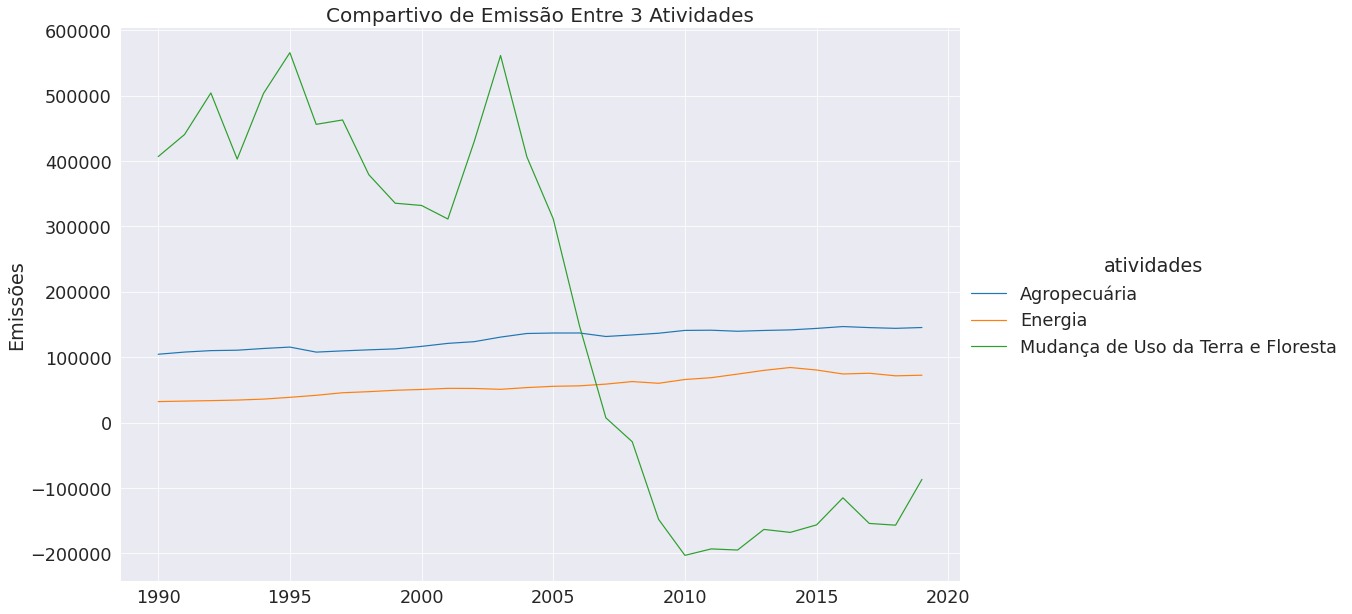

In [ ]:
ativi_emissoes = gases_est
ativi_emissoes= ativi_emissoes[ativi_emissoes['nivel_1'].isin(['Agropecuária', 'Mudança de Uso da Terra e Floresta', 'Energia'])]
ativi_emissoes.rename(columns={'nivel_1': 'atividades'}, inplace = True)
ativi_emissoes = ativi_emissoes.loc[(ativi_emissoes['ano'] > 1989) & (ativi_emissoes['ano'] < 2020)]
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=ativi_emissoes, ci=None, kind="line", hue='atividades', height = 9, aspect = 1.6)
plt.title('Compartivo de Emissão Entre 3 Atividades', fontsize = 20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

In [ ]:
taxas_emissoes = gases_est
taxas_emissoes.rename(columns={'nivel_1': 'atividades'}, inplace = True)
## PARA UMA ANÁLISE MAIS ESPECÍFICA, DEVE-SE RESTRINGIR OS DADOS PARA AS ATIVIDADES QUE EFETIVAMENTE ALTERARAM O USO DA TERRA
taxas_emissoes = taxas_emissoes[taxas_emissoes['atividades'].isin(['Agropecuária', 'Mudança de Uso da Terra e Floresta'])]
## COMO HÁ POUCOS DADOS FALTANTES, NÃO SE ALTERA A ANÁLISE DOS DADOS SE ELES FOREM RETIRADOS
taxas_emissoes = taxas_emissoes.dropna(subset=["emissao"])
## COMO OS DADOS ANTES DOS ANOS 90 SÃO INCIPIENTES, DEVE-SE CONSIDERAR APENAS OS DADOS A PARTIR DO ANOS 90. ALÉM DISSO, NO ANO DE 2020, PRINCIPALMENTE POR CONTA DA PANDEMIA, 
## OS DADOS SÃO DISTINTOS DOS ANTERIORES, ENTÃO OPTOU-SE POR DESCONSIDERÁ-LOS
taxas_emissoes = taxas_emissoes.loc[(taxas_emissoes['ano'] > 1989) & (taxas_emissoes['ano'] < 2020)]
taxas_emissoes.tail()

,ano,sigla_uf,atividades,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
3276628,2019,TO,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Cerrado,NÃO SE APLICA,NÃO SE APLICA,NÃO SE APLICA,Emissão,CO2e (t) GTP-AR5,AGROPEC,NÃO SE APLICA,125938.0
3276629,2019,TO,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Cerrado,NÃO SE APLICA,NÃO SE APLICA,NÃO SE APLICA,Emissão,CO2e (t) GWP-AR2,AGROPEC,NÃO SE APLICA,325922.0
3276630,2019,TO,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Cerrado,NÃO SE APLICA,NÃO SE APLICA,NÃO SE APLICA,Emissão,CO2e (t) GWP-AR4,AGROPEC,NÃO SE APLICA,362070.0
3276631,2019,TO,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Cerrado,NÃO SE APLICA,NÃO SE APLICA,NÃO SE APLICA,Emissão,CO2e (t) GWP-AR5,AGROPEC,NÃO SE APLICA,380421.0
3276632,2019,TO,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Cerrado,NÃO SE APLICA,NÃO SE APLICA,NÃO SE APLICA,Emissão,N2O (t),AGROPEC,NÃO SE APLICA,365.0


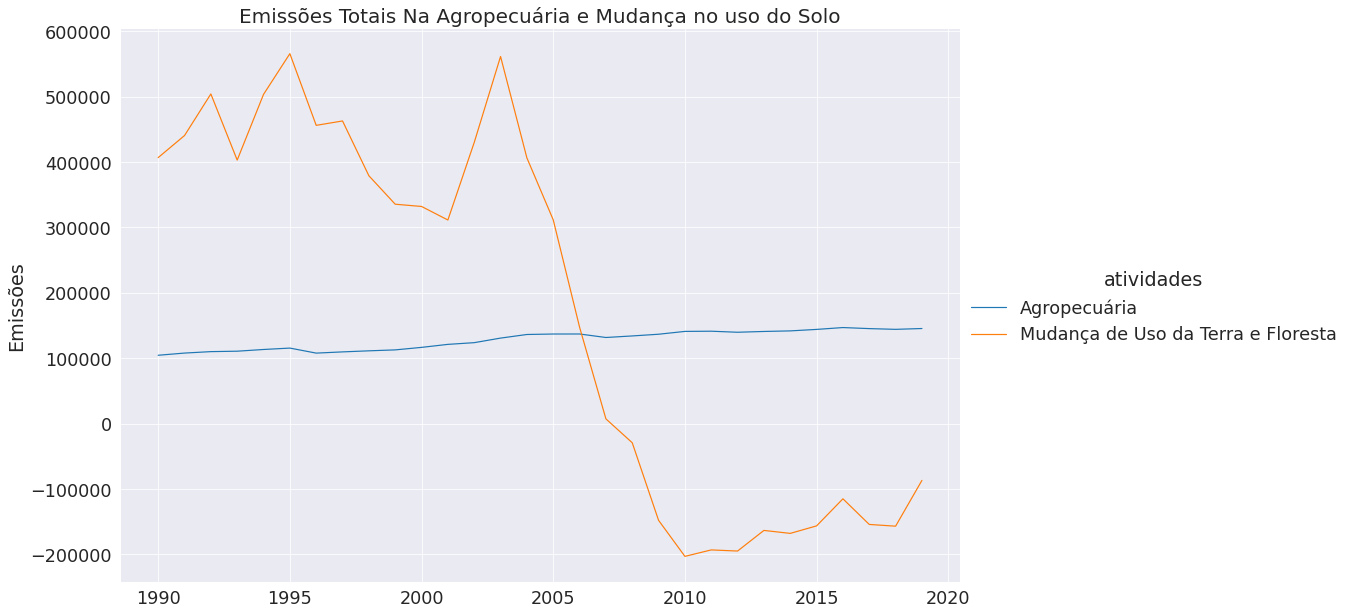

In [ ]:
## COMPARANDO A EMISSÃO GERAL, DISCRIMINANDO ENTRE AGROPECUÁRIA E MUDANÇA NO USO DO SOLO
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=taxas_emissoes, ci=None, kind="line", hue='atividades', height = 9, aspect = 1.6)
plt.title("Emissões Totais Na Agropecuária e Mudança no uso do Solo", fontsize=20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()


In [ ]:
## COMO QUEREMOS SOMAR AS EMISSOES DE CADA ESTADOS, UTILIZAMOS O MÉTODO GROUPBY, PASSANDO UM DICIONÁRIO COM A FUNÇÃO 'SUM' NA COLUNA 'EMISSAO'
soma_emissao = gases_est
soma_emissao = soma_emissao.loc[(soma_emissao['ano'] > 1989) & (soma_emissao['ano'] < 2020)]
soma_emissao = soma_emissao.groupby('sigla_uf').agg({'emissao':'sum'})
## APÓS A OPERAÇÃO, O INDEX FICOU DEFINIDO COMO 'SIGLA_UF', MAS DEVE-SE VOLTAR O INDEX AO ORIGINAL
soma_emissao = soma_emissao.reset_index()
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.catplot(data=soma_emissao,kind='bar',x='emissao',y='sigla_uf', height = 7, aspect = 1.5)
plt.title('Emissão Total de Gases por Estado em 10tri ton', y=1, fontsize = 20)
plt.ylabel('Estados do Brasil')
plt.xlabel('Emissões')
plt.show()

NameError: ignored

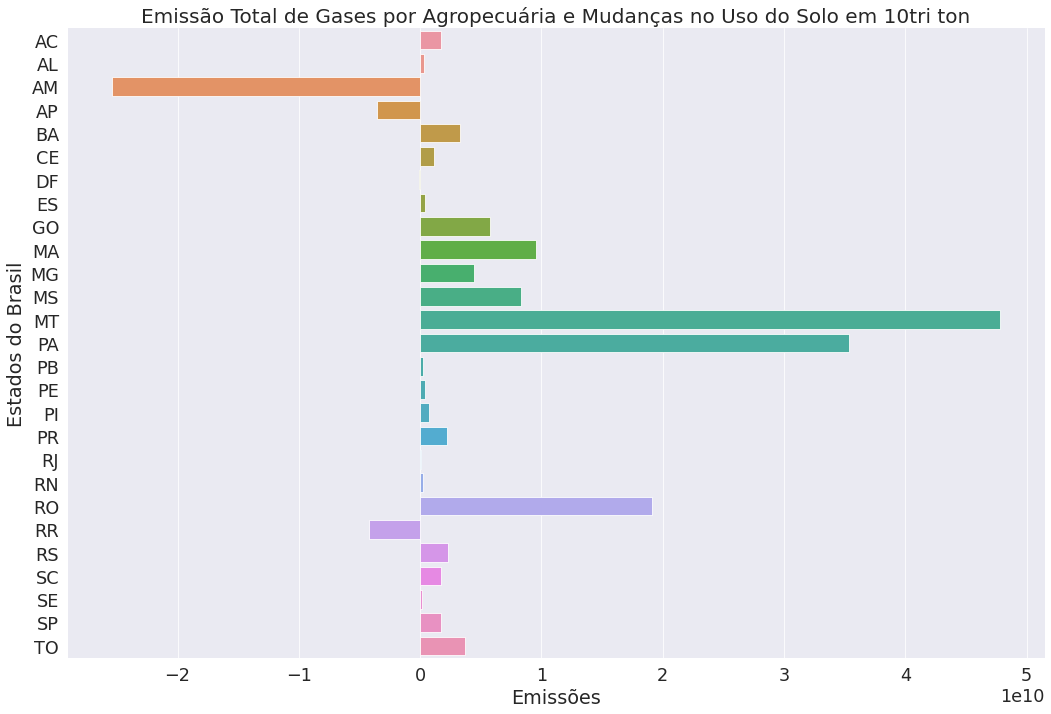

In [ ]:
## COMO QUEREMOS SOMAR AS EMISSOES DE CADA ESTADOS, UTILIZAMOS O MÉTODO GROUPBY, PASSANDO UM DICIONÁRIO COM A FUNÇÃO 'SUM' NA COLUNA 'EMISSAO'
soma_emissao_2 = taxas_emissoes.groupby('sigla_uf').agg({'emissao':'sum'})
## APÓS A OPERAÇÃO, O INDEX FICOU DEFINIDO COMO 'SIGLA_UF', MAS DEVE-SE VOLTAR O INDEX AO ORIGINAL
soma_emissao_2 = soma_emissao_2.reset_index()
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.catplot(data=soma_emissao_2,kind='bar',x='emissao',y='sigla_uf', height = 10, aspect = 1.5)
plt.title('Emissão Total de Gases por Agropecuária e Mudanças no Uso do Solo em 10tri ton', y=1, fontsize = 20)
plt.ylabel('Estados do Brasil')
plt.xlabel('Emissões')
plt.show()

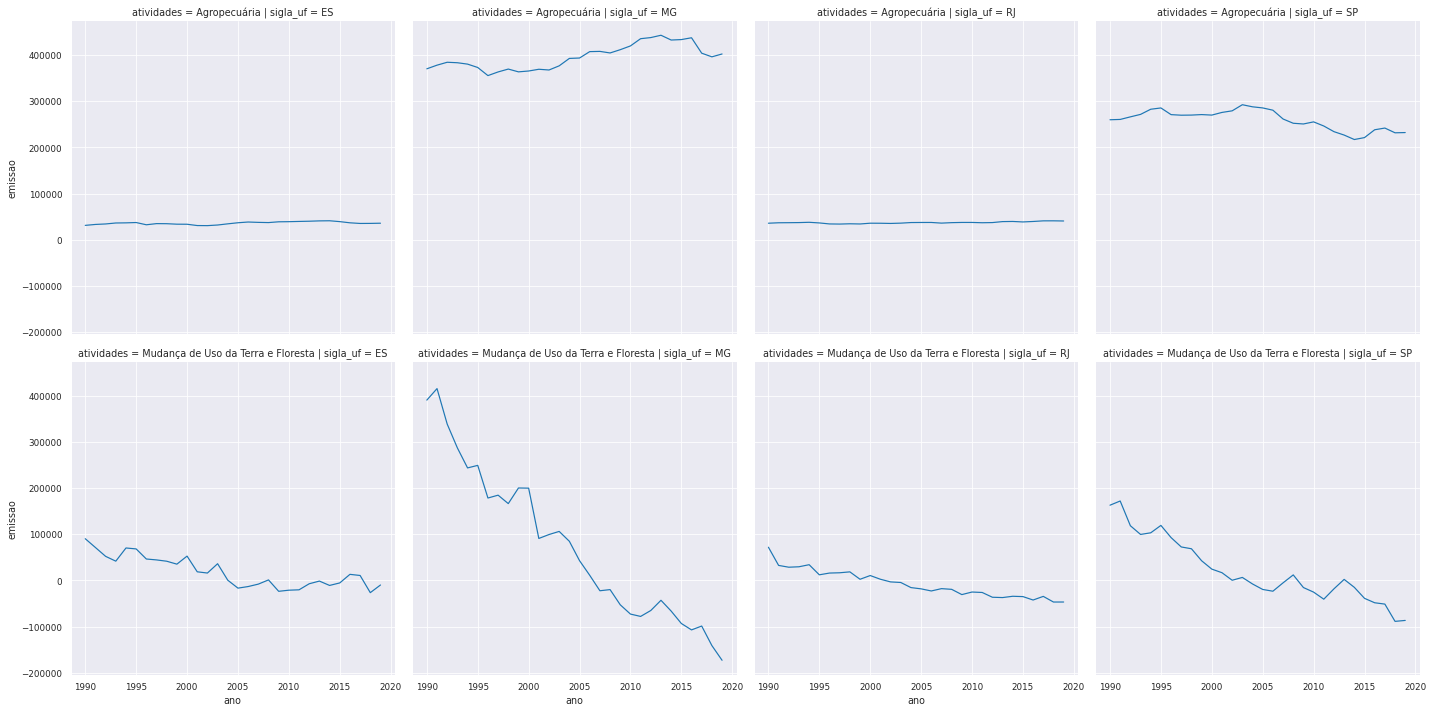

In [ ]:
## SEPARANDO OS DADOS PELOS ESTADOS QUE ESTÃO NO SUDESTE
emissao_sudeste = taxas_emissoes[taxas_emissoes['sigla_uf'].isin(['SP', 'RJ', 'MG', 'ES'])]
sns.set_style("darkgrid")
sns.set_context('paper')
sns.relplot(x="ano", y="emissao", data=emissao_sudeste, ci=None, kind="line", col='sigla_uf', row='atividades')
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

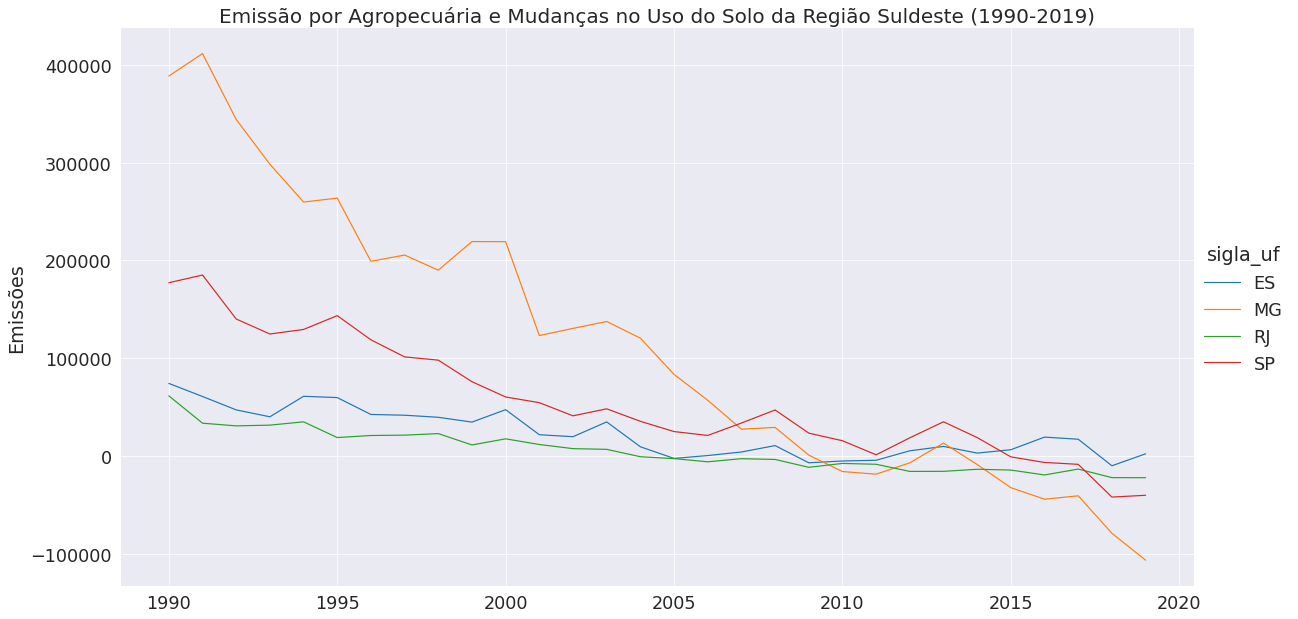

In [ ]:
emissao_sudeste = taxas_emissoes[taxas_emissoes['sigla_uf'].isin(['SP', 'RJ', 'MG', 'ES'])]
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=emissao_sudeste, ci=None, kind="line", hue ="sigla_uf", height = 9, aspect = 1.9)
plt.title('Emissão por Agropecuária e Mudanças no Uso do Solo da Região Suldeste (1990-2019)', y=1, fontsize = 20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

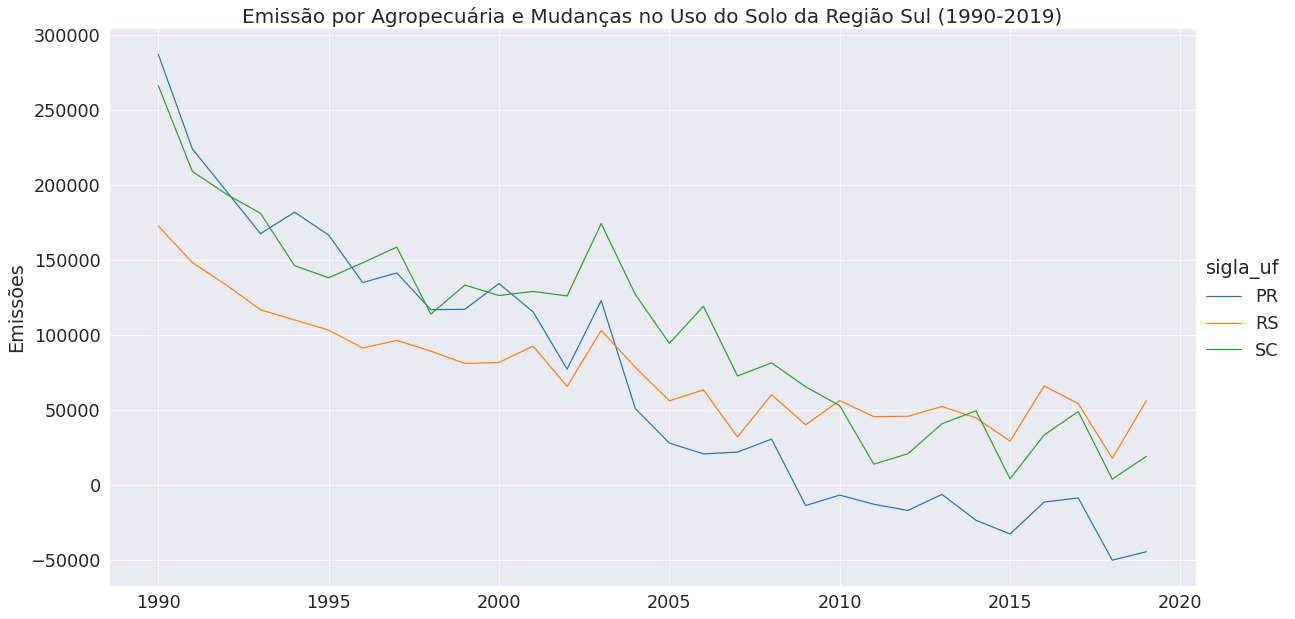

In [ ]:
emissao_sul = taxas_emissoes[taxas_emissoes['sigla_uf'].isin(['PR', 'SC', 'RS'])]
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=emissao_sul, ci=None, kind="line", hue ="sigla_uf", height = 9, aspect = 1.9)
plt.title('Emissão por Agropecuária e Mudanças no Uso do Solo da Região Sul (1990-2019)', y=1, fontsize = 20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

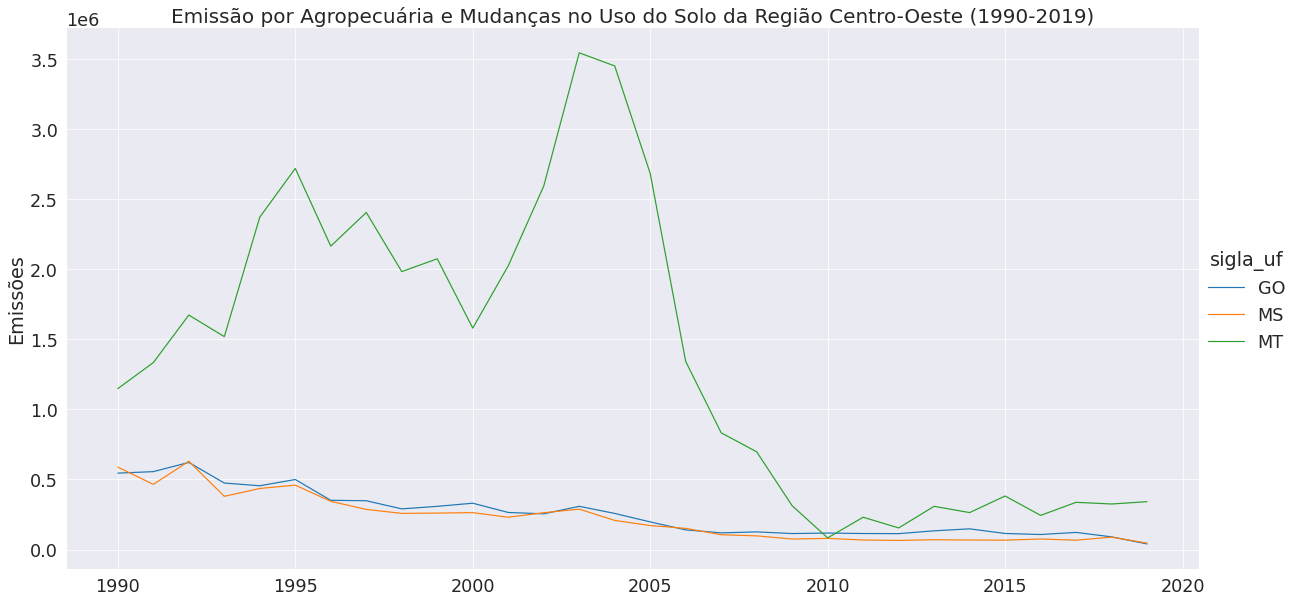

In [ ]:
emissao_centooeste = taxas_emissoes[taxas_emissoes['sigla_uf'].isin(['GO', 'MT', 'MS'])]
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=emissao_centooeste, ci=None, kind="line", hue ="sigla_uf", height = 9, aspect = 1.9)
plt.title('Emissão por Agropecuária e Mudanças no Uso do Solo da Região Centro-Oeste (1990-2019)', y=1, fontsize = 20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

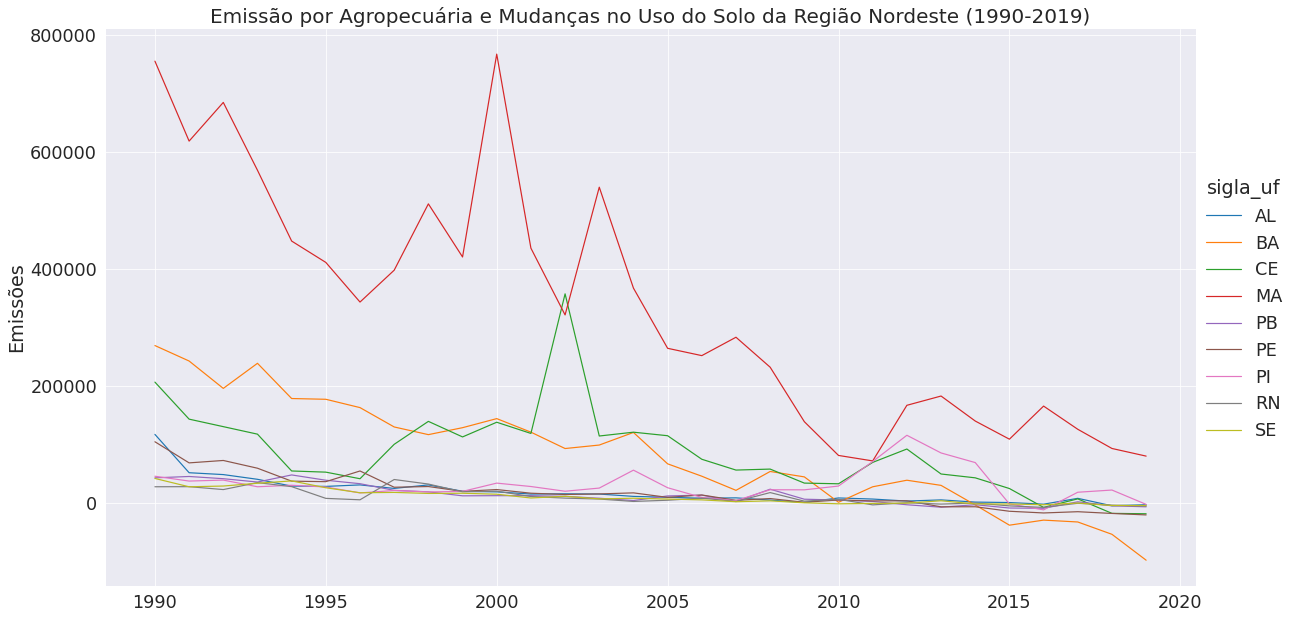

In [ ]:
emissao_nordeste = taxas_emissoes[taxas_emissoes['sigla_uf'].isin(['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'])]
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=emissao_nordeste, ci=None, kind="line", hue ="sigla_uf", height = 9, aspect = 1.9)
plt.title('Emissão por Agropecuária e Mudanças no Uso do Solo da Região Nordeste (1990-2019)', y=1, fontsize = 20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

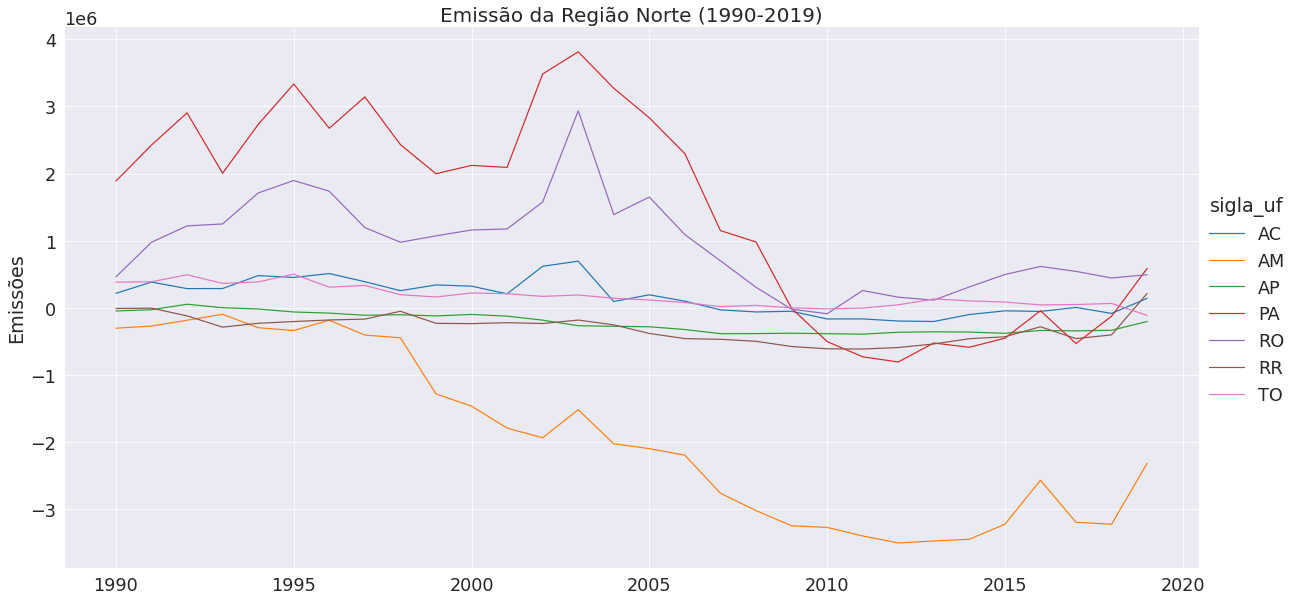

In [ ]:
emissao_norte = taxas_emissoes[taxas_emissoes['sigla_uf'].isin(['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'])]
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
sns.relplot(x="ano", y="emissao", data=emissao_norte, ci=None, kind="line", hue ="sigla_uf", height = 9, aspect = 1.9)
plt.title('Emissão por Agropecuária e Mudanças no Uso do Solo da Região Norte (1990-2019)', y=1, fontsize = 20)
plt.xlabel('')
plt.ylabel('Emissões')
plt.show()

In [ ]:
df_emissao_n0 =  gases_est.loc[(gases_est['ano'] > 1989) & (gases_est['ano'] < 1991)]
df_emissao_n0 = df_emissao_n0.groupby(['ano', 'sigla_uf'], as_index=False)['emissao'].sum()
df_emissao_n0 = df_emissao_n0.set_index('sigla_uf')
df_emissao_n0.head()

,ano,emissao
sigla_uf,,
AC,1990,7.743746e+07
AL,1990,7.335693e+07
AM,1990,-1.199342e+08
AP,1990,-2.235160e+07
BA,1990,4.267671e+08


In [ ]:
popu90_est_dict = {'PA': 5181570, 'RO': 1130874, 'AC': 417165, 'AM': 2102901, 'RR': 215950, 'AP': 288690, 
             'MT': 2022524, 'MS': 1778741, 'GO': 4012562, 'TO': 920116, 'DF': 1598415, 'BA': 11855157, 
             'MA': 4929029, 'PI': 2581215, 'CE': 6362620, 'PE': 7122548, 'PB': 3200677, 'RN': 2414121, 
             'AL': 2512991, 'SE': 1491867, 'PR': 8443299, 'RS': 9135479, 'SC': 4538248,
             'SP': 31546473, 'MG': 1573961, 'ES': 2598505, 'RJ': 12783761}

popu90_estados = pd.DataFrame.from_dict(popu90_est_dict, orient='index')
estados = popu90_estados.index.tolist()
print(popu90_estados)

           0
PA   5181570
RO   1130874
AC    417165
AM   2102901
RR    215950
AP    288690
MT   2022524
MS   1778741
GO   4012562
TO    920116
DF   1598415
BA  11855157
MA   4929029
PI   2581215
CE   6362620
PE   7122548
PB   3200677
RN   2414121
AL   2512991
SE   1491867
PR   8443299
RS   9135479
SC   4538248
SP  31546473
MG   1573961
ES   2598505
RJ  12783761


In [ ]:
for d in estados:
    df_emissao_n0.loc[d, 'emissao90 população'] = df_emissao_n0.loc[d,'emissao']/popu90_estados.loc[d][0]
df_emissao_n0

,ano,emissao,emissao90 população
sigla_uf,,,
AC,1990,7.743746e+07,185.627893
AL,1990,7.335693e+07,29.191084
AM,1990,-1.199342e+08,-57.032753
AP,1990,-2.235160e+07,-77.424241
BA,1990,4.267671e+08,35.998434
CE,1990,1.129306e+08,17.749073
DF,1990,1.610534e+07,10.075821
ES,1990,1.010958e+08,38.905386
GO,1990,4.450598e+08,110.916620


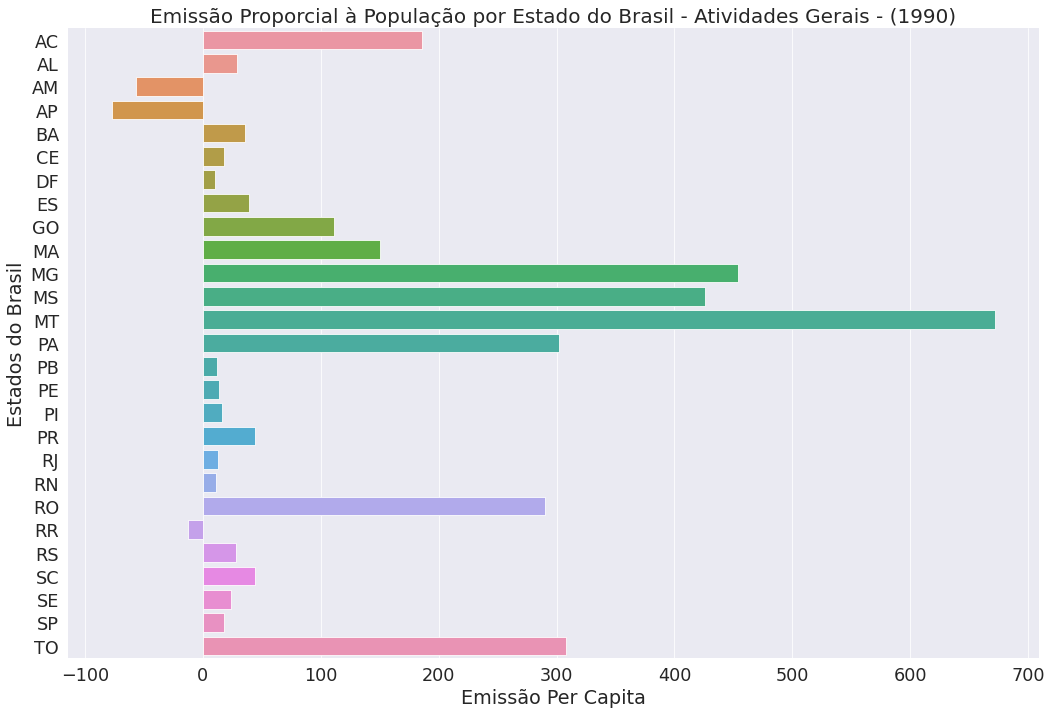

In [ ]:
df_emissao_n0 = df_emissao_n0.reset_index()
sns.catplot(data=df_emissao_n0, kind='bar', x='emissao90 população', y='sigla_uf', height = 10, aspect = 1.5)
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=2)
plt.title('Emissão Proporcial à População por Estado do Brasil - Atividades Gerais - (1990)', y=1, fontsize = 20)
plt.xlabel('Emissão Per Capita')
plt.ylabel('Estados do Brasil')
plt.show()

In [ ]:
df_emissao_n1 =  gases_est.loc[(gases_est['ano'] > 2018) & (gases_est['ano'] < 2020)]
df_emissao_n1 = df_emissao_n1.groupby(['ano', 'sigla_uf'], as_index=False)['emissao'].sum()
df_emissao_n1 = df_emissao_n1.set_index('sigla_uf')
df_emissao_n1.head()

,ano,emissao
sigla_uf,,
AC,2019,5.582760e+07
AL,2019,2.300523e+07
AM,2019,-9.471205e+08
AP,2019,-1.034339e+08
BA,2019,3.042583e+07


In [ ]:
popu19_est_dict = {'PA': 8777124, 'RO': 1815278, 'AC': 906876, 'AM': 4269995, 'RR': 652713, 'AP': 877613, 
             'MT': 3567234, 'MS': 2839188, 'GO': 7206589, 'TO': 1607363, 'DF': 3094325, 'BA': 14985284, 
             'MA': 7153262, 'PI': 3289290, 'CE': 9240580, 'PE': 9674793, 'PB': 4059905, 'RN': 3560903, 
             'AL': 3365351, 'SE': 2338474	, 'PR': 11597484, 'RS': 11466630, 'SC': 7338473,
             'SP': 46649132, 'MG': 21411923	, 'ES': 4108508, 'RJ': 17463349}

popu19_estados = pd.DataFrame.from_dict(popu19_est_dict, orient='index')
estados_19 = popu19_estados.index.tolist()
print(popu19_estados)

           0
PA   8777124
RO   1815278
AC    906876
AM   4269995
RR    652713
AP    877613
MT   3567234
MS   2839188
GO   7206589
TO   1607363
DF   3094325
BA  14985284
MA   7153262
PI   3289290
CE   9240580
PE   9674793
PB   4059905
RN   3560903
AL   3365351
SE   2338474
PR  11597484
RS  11466630
SC   7338473
SP  46649132
MG  21411923
ES   4108508
RJ  17463349


In [ ]:
for p in estados_19:
    df_emissao_n1.loc[p, 'emissao19 população'] = df_emissao_n1.loc[p,'emissao']/popu19_estados.loc[p][0]
df_emissao_n1

,ano,emissao,emissao19 população
sigla_uf,,,
AC,2019,5.582760e+07,61.560347
AL,2019,2.300523e+07,6.835909
AM,2019,-9.471205e+08,-221.808339
AP,2019,-1.034339e+08,-117.858182
BA,2019,3.042583e+07,2.030381
CE,2019,9.484803e+07,10.264294
DF,2019,3.316553e+07,10.718179
ES,2019,1.445942e+08,35.193840
GO,2019,1.268028e+08,17.595396


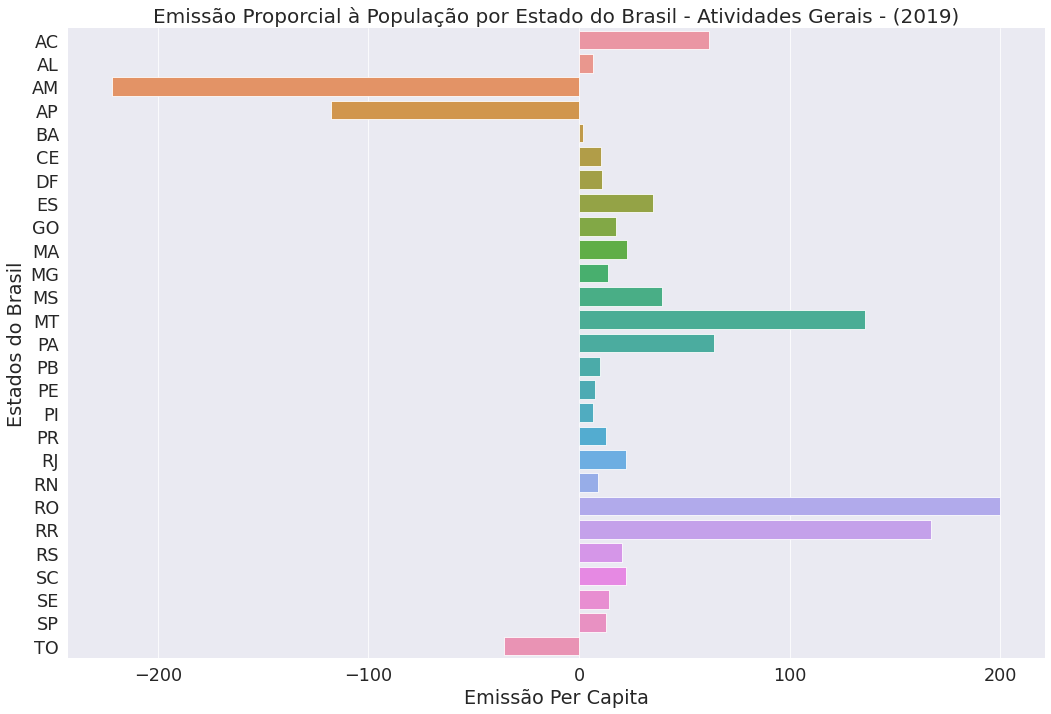

In [ ]:
df_emissao_n1 = df_emissao_n1.reset_index()
sns.catplot(data=df_emissao_n1, kind='bar', x='emissao19 população', y='sigla_uf', height = 10, aspect = 1.5)
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=1.5)
plt.title('Emissão Proporcial à População por Estado do Brasil - Atividades Gerais - (2019)', y=1, fontsize = 20)
plt.xlabel('Emissão Per Capita')
plt.ylabel('Estados do Brasil')
plt.show()

In [ ]:
gases_atividades_gerais = gases_est
gases_atividades_gerais = gases_atividades_gerais.loc[(gases_atividades_gerais['ano'] > 1989) & (gases_atividades_gerais['ano'] < 2020)]

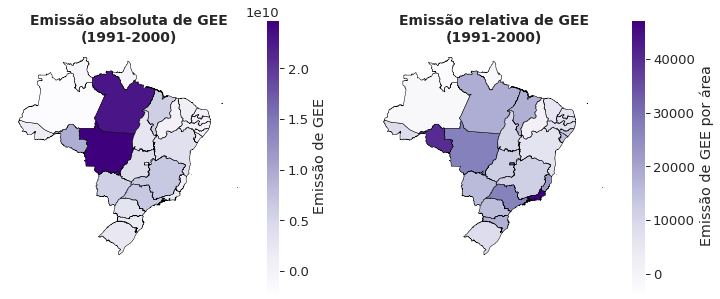

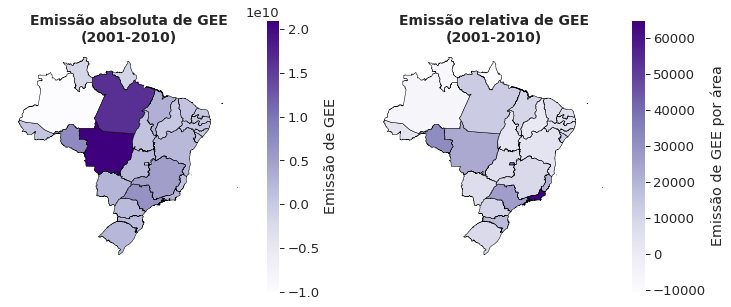

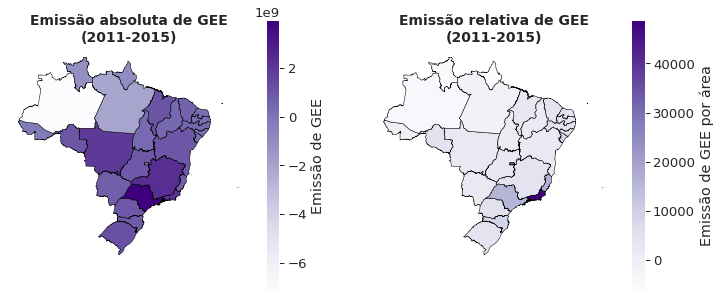

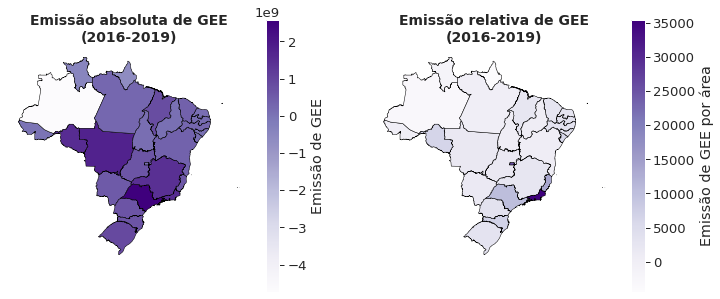

In [ ]:
##PLOTANDO MAPAS DE EMISSOES TOTAIS POR ESTADO E POR DECADA##
gee_gerais = gases_atividades_gerais.set_index('sigla_uf')

#Agrupando os dados de emissao entre decadas

# Entre 1990-2000

df_gee_90_00 = gee_gerais.loc[gee_gerais['ano'] < 2001][['emissao']].groupby('sigla_uf').sum()
df_gee_90_00['decada'] = '1991-2000'

# Entre 2001-2010

df_gee_01_10 = gee_gerais.loc[(gee_gerais['ano'] > 2000) & (gee_gerais['ano'] < 2011)][['emissao']].groupby('sigla_uf').sum()
df_gee_01_10['decada'] = '2001-2010'

#Entre 2011-2015

df_gee_11_15 = gee_gerais.loc[(gee_gerais['ano'] > 2010) & (gee_gerais['ano'] < 2016)][['emissao']].groupby('sigla_uf').sum()
df_gee_11_15['decada'] = '2011-2015'


#Entre 2016-2019
df_gee_16_20 = gee_gerais.loc[(gee_gerais['ano'] > 2015) & (gee_gerais['ano'] < 2020)][['emissao']].groupby('sigla_uf').sum()
df_gee_16_20['decada'] = '2016-2019'

df_gee_acum = df_gee_90_00.append(df_gee_01_10).append(df_gee_11_15).append(df_gee_16_20)

#Calculando as emissoes por unidade de area de cada estado

for x in estados:
  df_gee_acum.loc[x, 'emi_area'] = df_gee_acum.loc[x,'emissao']/area_estados.loc[x][0]

gdf_gee_acum = df_gee_acum.merge(gdf_estados, on='sigla_uf').drop(
    columns=['CD_UF', 'NM_REGIAO', 'NM_UF'])

gdf_gee_acum = GeoDataFrame(gdf_gee_acum)


for ano in gdf_gee_acum['decada'].unique():
  fig, ax = plt.subplots(1, 2, figsize=[12, 5])
  x = gdf_gee_acum.loc[gdf_gee_acum['decada'] == ano]
  x.set_index('sigla_uf', inplace=True)
  x.plot(column='emissao', edgecolor="black", cmap='Purples',
                    ax=ax[0], legend=True,linewidth=0.5, 
                    legend_kwds={'label': "Emissão de GEE"})
  ax[0].set_axis_off()
  ax[0].set_title(f'Emissão absoluta de GEE\n({ano})', fontdict={'fontsize': 14,
 'fontweight' : 'semibold'})
  x.plot(column='emi_area', edgecolor="black", cmap='Purples',
         ax=ax[1], legend=True, linewidth=0.5, 
         legend_kwds={'label': "Emissão de GEE por área"})
  ax[1].set_axis_off()
  ax[1].set_title(f'Emissão relativa de GEE\n({ano})', fontdict={'fontsize': 14,
 'fontweight' : 'semibold'})
  plt.show()